<a href="https://colab.research.google.com/github/O0O0O0O0OP48763/123/blob/master/DG_HW1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---HW1.5---

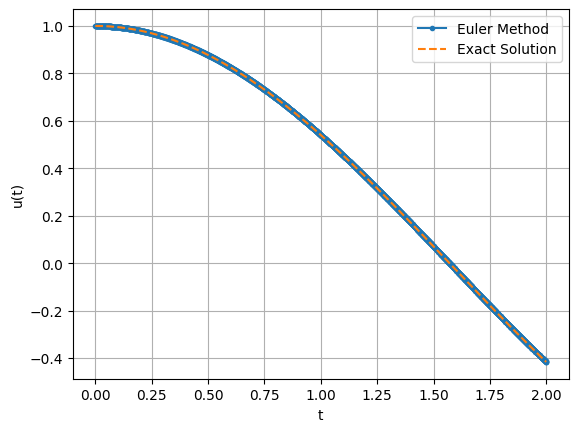

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定義微分方程
def f(t, u):
    return -2100 * (u - np.cos(t)) - np.sin(t)

# 設定參數
T = 2  # 終止時間
dt = 0.00095  # 步長，可以客製化調整

N = int(T / dt) + 1  # 時間步數

# 定義時間點
t_values = np.zeros(N+1)
for i in range(N-1):
  t_values[i+1] = t_values[i] + dt
t_values[N] = T


# 定義解的值
u_values = np.zeros(N+1)
u_values[0] = 1 # 初始條件 u(0) = 1
for i in range(N-1):
    u_values[i+1] = u_values[i] + dt * f(t_values[i], u_values[i])
u_values[N] = u_values[N-1] + (T - t_values[N-1]) * f(t_values[N-1], u_values[N-1])


# 解析解 (用來對比)
u_exact = lambda t: np.cos(t)
exact_values = u_exact(t_values)

# 繪圖
plt.plot(t_values, u_values, label="Euler Method", marker="o", markersize=3)
plt.plot(t_values, exact_values, label="Exact Solution", linestyle="dashed")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.grid()
plt.show()

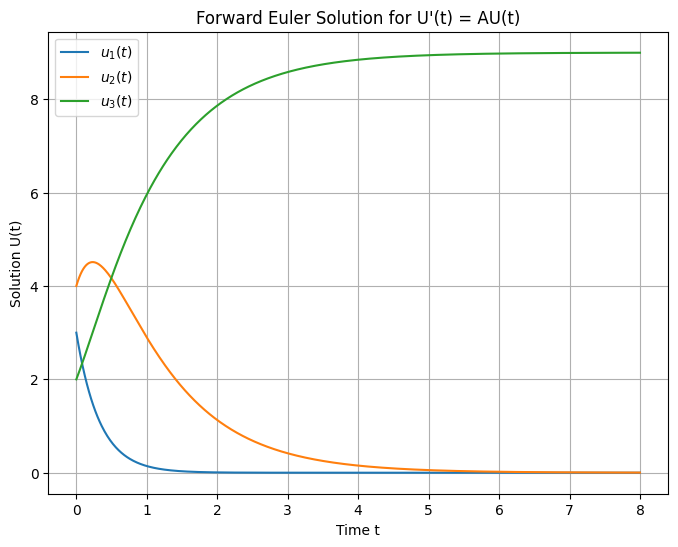

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定義 A 矩陣
A = np.array([[-3, 0, 0],
        [3, -1, 0],
        [0, 1, 0]])

# 初始條件
u0 = np.array([3, 4, 2])

# 設定時間範圍
T = 8    # 終止時間
# dt = 2 / np.max(np.abs(np.real(np.linalg.eigvals(A))))  # FE 方法的穩定時間步長
dt = 0.01
N = int(T / dt) + 1  # 時間步數

# 定義時間點
t_values = np.zeros(N+1)
for i in range(N-1):
  t_values[i+1] = t_values[i] + dt
t_values[N] = T

# 定義初值
u_values = np.zeros((N+1, 3))
u_values[0] = u0  # 設定初始值

# Forward Euler 時間迴圈
for i in range(N-1):
    u_values[i+1] = u_values[i] + dt * A @ u_values[i]
u_values[N] = u_values[N-1] + (T - t_values[N-1]) * A @ u_values[N-1]



# 繪製結果
plt.figure(figsize=(8, 6))
plt.plot(t_values, u_values[:, 0], label="$u_1(t)$")
plt.plot(t_values, u_values[:, 1], label="$u_2(t)$")
plt.plot(t_values, u_values[:, 2], label="$u_3(t)$")
plt.xlabel("Time t")
plt.ylabel("Solution U(t)")
plt.title("Forward Euler Solution for U'(t) = AU(t)")
plt.legend()
plt.grid()
plt.show()


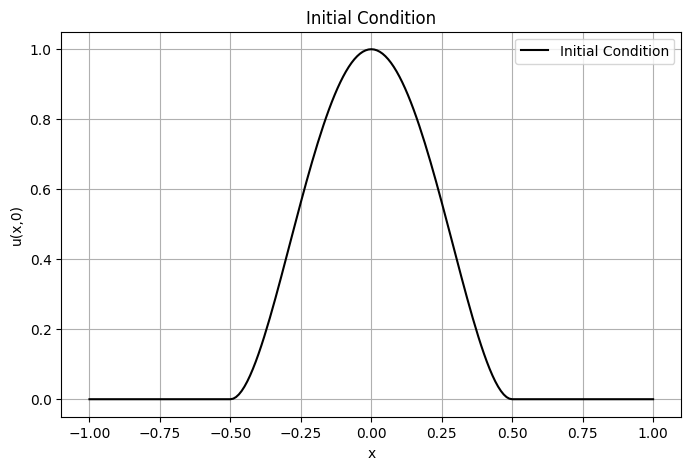

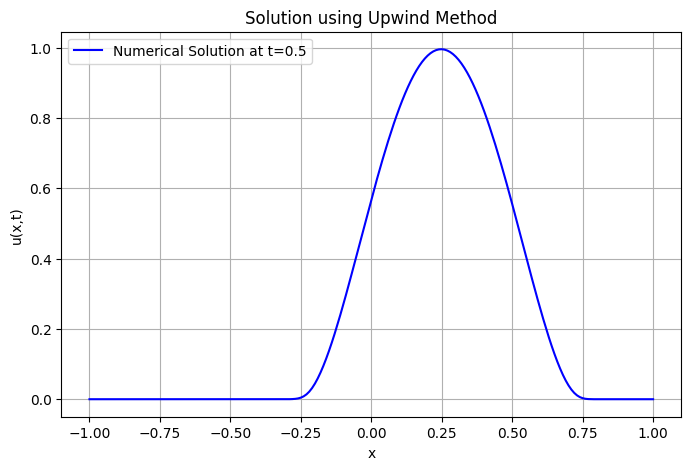

L2 Error: 0.32067197066673475


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 參數設定
c = 0.5  # 波速
x_min, x_max = -1, 1  # 空間區間
t_max = 0.5  # 最大時間

Nx = 200  # 空間網格數
dx = (x_max - x_min) / Nx  # 空間步長
dt = 0.8 * dx / c  # CFL 條件 (0.8 是安全係數)
Nt = int(t_max / dt)  # 時間步數

lambda_c = c * dt / dx  # CFL 數

# 建立網格
x = np.linspace(x_min, x_max, Nx + 1)
u = np.zeros(Nx + 1)  # 初始條件

# 設定初始條件 v(x)
for i in range(Nx + 1):
    if -0.5 <= x[i] <= 0.5:
        u[i] = (x[i] - 0.5) ** 2 * (x[i] + 0.5) ** 2 * 2 ** 4
    else:
        u[i] = 0

# 繪製初始條件
plt.figure(figsize=(8, 5))
plt.plot(x, u, label="Initial Condition", color='black')
plt.xlabel("x")
plt.ylabel("u(x,0)")
plt.title("Initial Condition")
plt.grid()
plt.legend()
plt.show()

# 計算時間演化
u_new = np.copy(u)
for n in range(Nt):
    for j in range(1, Nx + 1):
        u_new[j] = u[j] - lambda_c * (u[j] - u[j - 1])  # Upwind Scheme

    # 邊界條件 (周期性邊界)
    u_new[0] = u_new[-1]  # u(1,t) = u(-1,t)

    # 更新數值解
    u[:] = u_new[:]

# 繪製結果
plt.figure(figsize=(8, 5))
plt.plot(x, u, label=f"Numerical Solution at t={t_max}", color='blue')
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solution using Upwind Method")
plt.grid()
plt.legend()
plt.show()

exact_solution = np.array([(x[i] - 0.5 - c*t_max) ** 2 * (x[i] + 0.5 - c*t_max) ** 2 * 24 if -0.5+c*t_max <= x[i] <= 0.5+c*t_max else 0 for i in range(Nx+1)])
L2_error = np.sqrt(np.sum((u - exact_solution) ** 2) * dx)
print(f"L2 Error: {L2_error}")


# 檢查一下程式碼有沒有奇怪的bug，沒有的話就把報告弄一弄(這行要記得刪掉哦)
